In [3]:
# import libraries
import numpy as np         
import seaborn as sns                
import matplotlib.pyplot as plt                       
import pandas as pd                  


In [3]:
# import data in csv file 
df = pd.read_csv('baby_activity_logs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   baby_activity    5715 non-null   object
 1   time             5715 non-null   object
 2   clock_system     5715 non-null   object
 3   parent_activity  5715 non-null   object
 4   status           5715 non-null   object
 5   unit             3494 non-null   object
 6   month            5715 non-null   object
 7   day              5715 non-null   int64 
 8   year             5715 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 402.0+ KB


In [4]:
df.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
0,Diaper,1:00,AM,change,Wet,NaN,February,12,2022
1,Feeding,1:00,AM,Formula,1.69,oz.,February,12,2022
2,Feeding,1:00,PM,Formula,0.5,oz.,March,20,2022
3,Diaper,1:00,PM,change,Wet,NaN,March,20,2022
4,Feeding,1:00,PM,Formula,2,oz.,March,23,2022


In [ ]:
# Formula data
df_formula = df[(df['baby_activity'] == 'Feeding') & (df['parent_activity'] == 'Formula')].dropna()
df_formula.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
1,Feeding,1:00,AM,Formula,1.69,oz.,February,12,2022
2,Feeding,1:00,PM,Formula,0.5,oz.,March,20,2022
4,Feeding,1:00,PM,Formula,2,oz.,March,23,2022
8,Feeding,1:00,PM,Formula,2.7,oz.,July,27,2022
12,Feeding,1:01,PM,Formula,1,oz.,March,1,2022


In [51]:
df_formula['status'] = df_formula['status'].astype('float64')

<Axes: ylabel='Density'>

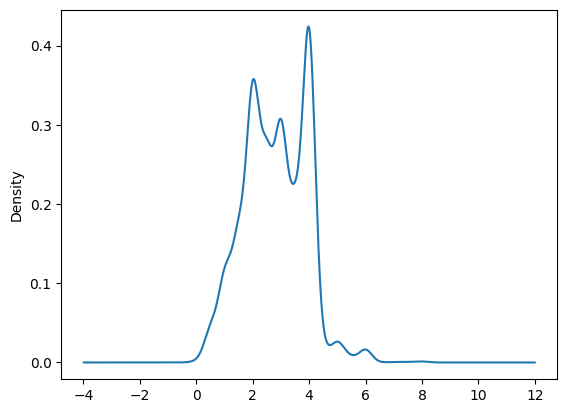

In [52]:
df_formula['status'].plot(kind='density')

In [53]:
df_formula.describe().T

,count,mean,std,min,25%,50%,75%,max
status,2934.0,2.804646,1.100788,0.01,2.0,3.0,4.0,8.0
day,2934.0,15.715746,8.664267,1.00,8.0,16.0,23.0,31.0
year,2934.0,2022.099182,0.298957,2022.00,2022.0,2022.0,2022.0,2023.0


In [56]:
df_group = df_formula.groupby('month')['status'].mean()
df_group

month
April        2.329668
August       3.150000
December     3.460406
February     2.202280
January      3.197159
July         3.454185
June         3.038880
March        2.034316
May          2.595125
November     3.073000
October      3.195930
September    3.115837
Name: status, dtype: float64

<Axes: xlabel='month'>

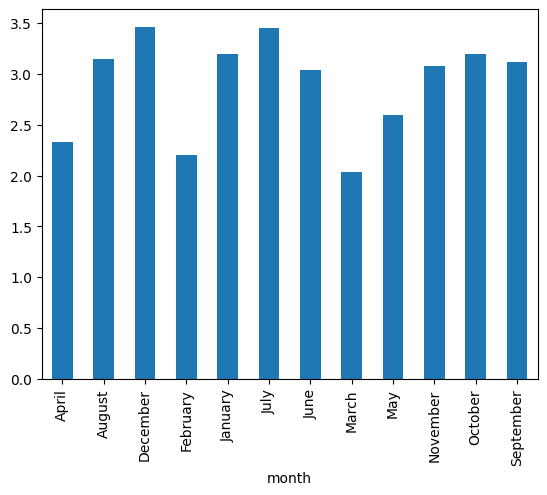

In [57]:
df_group.plot(kind='bar')

In [5]:
# penguins dataset
df_pen = pd.read_csv("./penguins.csv")
df_pen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df_pen.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df_clean = df_pen.dropna(subset='sex')

In [10]:
df_specific = df_clean[df_clean['species'].isin(['Agentoo', 'Adelie'])]
df_specific

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE


In [11]:
df_clean.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [17]:
# groupby
sep1 = df_clean[['species', 'island', 'bill_length_mm', 'bill_depth_mm']]
sep2 = df_clean[['species','flipper_length_mm', 'body_mass_g', 'sex']]

In [19]:
df_merge = sep1.merge(sep2,left_on='species', right_on='species')
df_merge.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.1,18.7,186.0,3800.0,FEMALE
2,Adelie,Torgersen,39.1,18.7,195.0,3250.0,FEMALE
3,Adelie,Torgersen,39.1,18.7,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.1,18.7,190.0,3650.0,MALE


In [22]:
use_query = df_clean.query('species=="Adelie"')
use_query

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE


In [27]:
use_query['specimen_length'] = use_query.apply(lambda row: row['flipper_length_mm'] * row['bill_depth_mm'], axis=1)
use_query.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_24612\3628312544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_query['specimen_length'] = use_query.apply(lambda row: row['flipper_length_mm'] * row['bill_depth_mm'], axis=1)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,specimen_length
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,3384.7
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,3236.4
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,3510.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,3724.9
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,3914.0


In [32]:
use_query['host'] = use_query.loc[:, 'bill_depth_mm']

C:\Users\Owner\AppData\Local\Temp\ipykernel_24612\2032907536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_query['host'] = use_query.loc[:, 'bill_depth_mm']
